In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
q_star = np.random.normal(loc = 0.0, scale = 1.0, size = 10)
q_star, np.argmax(q_star)

(array([-0.46096115,  0.10029114, -1.00502461, -0.20925692, -0.46712537,
         0.40869674, -1.19124208,  0.08621862,  1.62870271, -0.90484334]),
 8)

In [23]:
np.random.normal(loc = q_star[0], scale = 1.0)

0.5633324948893008

In [20]:
np.arange(10)[np.random.permutation(10)]

array([6, 5, 7, 8, 0, 4, 9, 2, 1, 3])

In [26]:
def k_armed_bandit(q_star, epsilon = 0.1, nStep = 10000):
    """
    One run of K-armed bandit simulation over 10000 time steps
    Here, K is not explicitly specified, instead it is derived from the length qstar
    """
    
    k = len(q_star)
    # we are facing a k-armed bandit problem
    Qt = np.zeros(k)
    # estimation of each action's value at time step t, with initiation of k zeros
    actioncnt = np.zeros(k, dtype = np.int)
    # denominator of times of each actions being selected

    a = np.zeros(nStep+1, dtype = np.int)
    # record the selected action at each time step
    r = np.zeros(nStep+1)
    # recode of the reward at each time step
    
    actionopt = np.argmax(q_star)
    # ground-truth optimal action when the bandit problem is stationnary, which is the largest qstar value
    optimalcnt = 0
    # denominator of times when the optimal action is selected
    optRatio = np.zeros(nStep+1, dtype = np.float)
 
    for t in range(1, nStep+1):
        # selection of action
        tmp = np.random.uniform(0,1)
        if tmp < epsilon:
            # random selection for an exploring action
            a[t] = np.random.randint(0, k)
            
        else:
            # greedy selection for an exploitation action
            perm = np.random.permutation(k)
            a[t] = perm[np.argmax(Qt[perm])]
            #print('greedy selection: a[{0}] = {1}'.format(t,a[t]))

        actioncnt[a[t]] = actioncnt[a[t]] + 1
 
        # reward which follows a normal distribution with mean = qstar[a[t]], and variance = 1.
        r[t] = np.random.normal(loc = q_star[a[t]], scale = 1.0)

        # update of evaluation of Qt values of the selected action
        Qt[a[t]] = Qt[a[t]] + (r[t] - Qt[a[t]])/actioncnt[a[t]]

        # Optimal Action Ratio tracking
        #print(a[t], optAct)
        if a[t] == actionopt:
            optimalcnt = optimalcnt + 1
        optRatio[t] = optimalcnt/t
        
    return a, r, Qt, actioncnt, optRatio

In [72]:
def k_armed_bandit_2000run(epsilon = 0.1, nStep = 10000):
    k = 10
    q_star = np.random.normal(loc = 0.0, scale = 1.0, size = k)

    a = np.zeros(nStep+1, dtype = np.int)
    r = np.zeros(nStep+1, dtype = np.float)
    optRatio = np.zeros(nStep+1, dtype = np.float)

    for i in range(2000):
        a_temp, r_temp, Qt, actioncnt, optRatio_temp = k_armed_bandit(q_star, epsilon, nStep)
        a += a_temp
        r += r_temp
        optRatio += optRatio_temp

    return a/2000, r/2000, optRatio/2000

In [64]:
nStep = 10000
epsilon = 0.1

k = 10
q_star = np.random.normal(loc = 0.0, scale = 1.0, size = k)
a, r, Qt, actioncnt, optRatio = k_armed_bandit(q_star, epsilon, nStep)

print('qstar = \n', q_star)
print('optimal action is action#{}\n'.format(np.argmax(q_star)))

qstar = 
 [ 0.8350099   0.0351314   0.38964825 -0.40732151  0.04240992 -0.64318451
 -0.55942238 -0.94682468 -0.07108046 -0.38470095]
optimal action is action#0



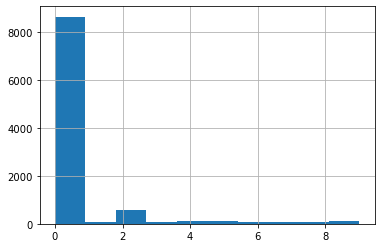

In [65]:
# print(actioncnt)
# plt.figure(figsize=(20, 6))
# plt.subplot(131)
plt.hist(a)
plt.grid()

Text(0.5, 1.0, 'Reward along the time')

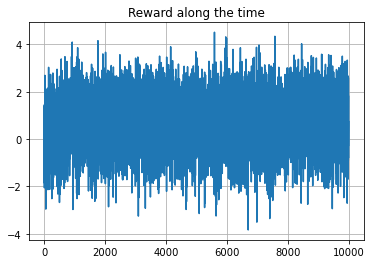

In [66]:
# plt.subplot(132)
plt.plot(r)
plt.grid()
plt.title('Reward along the time')

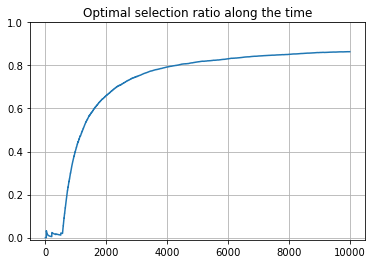

In [67]:
# plt.subplot(133)
plt.plot(optRatio)
plt.ylim((-0.01, 1))
plt.grid()
plt.title('Optimal selection ratio along the time')
plt.show()

(-1.5, 2.0)

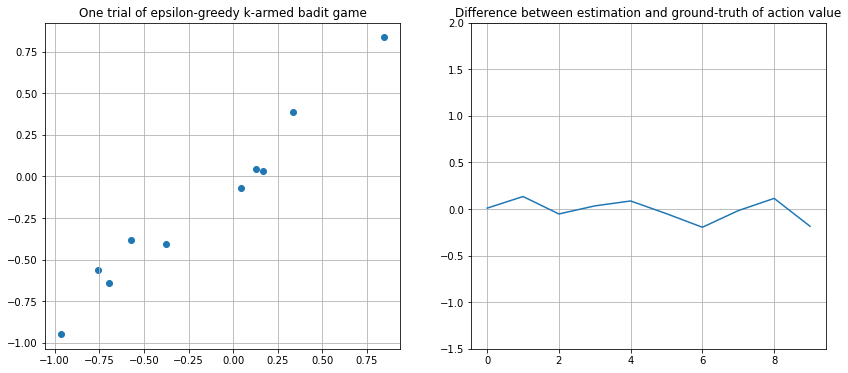

In [68]:
fig,ax = plt.subplots(1, 2, figsize=[14, 6])
ax[0].scatter(Qt, q_star)
ax[0].grid()
ax[0].set_title('One trial of epsilon-greedy k-armed badit game')
ax[1].plot(Qt - q_star)
ax[1].grid()
ax[1].set_title('Difference between estimation and ground-truth of action value')
ax[1].set_ylim(-1.5,2.0)

In [76]:
a_0, r_0, optRatio_0 = k_armed_bandit_2000run(epsilon=0.00, nStep = 1000)
a_1, r_1, optRatio_1 = k_armed_bandit_2000run(epsilon=0.01, nStep = 1000)
a_2, r_2, optRatio_2 = k_armed_bandit_2000run(epsilon=0.05, nStep = 1000)
a_3, r_3, optRatio_3 = k_armed_bandit_2000run(epsilon=0.10, nStep = 1000)

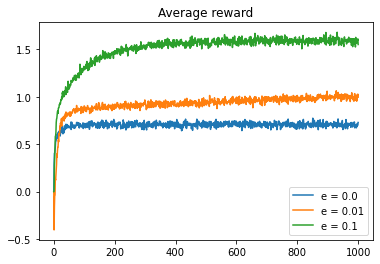

In [82]:
plt.plot(r_0)
plt.plot(r_1)
plt.plot(r_3)
plt.legend(['e = 0.0', 'e = 0.01', 'e = 0.1'])
plt.title('Average reward')
plt.show()

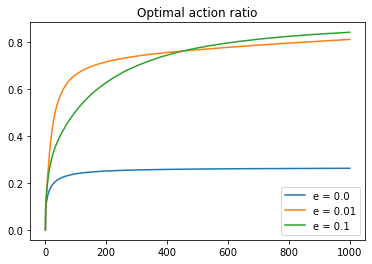

In [81]:
plt.plot(optRatio_0)
plt.plot(optRatio_1)
plt.plot(optRatio_3)
plt.legend(['e = 0.0', 'e = 0.01', 'e = 0.1'])
plt.title('Optimal action ratio')
plt.show()

In [7]:
import threading
import time

def test():

    for i in range(9):
        print('test', i, '\n')
        time.sleep(1)


thread = threading.Thread(target=test)
thread.start()

for i in range(5):
    print('main', i, '\n')
    time.sleep(1)

testmain 0 

 0 

maintest 1 

 1 

testmain 2  

2 

testmain 3 

 3 

testmain 4 

 4 

test 5 



test 6 

test 7 

test 8 

